In [37]:
import numpy as np
import re
import matplotlib.pyplot as plt

mean = 190
# var from the right
# 617(~mean+3std) - 190(mean) = 427/3
# std = 142.33
std_right = 142
min_len = 44
max_len = 617
beta_expected = 0.8
probe_size = 45
#beta_expected = 1
min_hib = 6
min_prob_loc,max_probe_loc = 0, 0

#cg06493994 - on the gene SCGN - not from the chip but indeed horvarth clock site
SCGN = """
GTGCCATAAAGAAAAGTTACATCTGGTTCAACTTTCTTATCTAATATCCA
AGCACTTTCTATAGATTATCCAACGAAAATTTCTAAATATATAGTCAAAA
GGTATCAGTGTAGTTTGTACACGTTTCCACAAAGCCTTGCCCAATTTTGA
ACAGTCCTGATTGTTAGAAAGCTCTGTGTTCCTCCAACTGATTTTTATCC
TTTGGTCTTAATGTGGCTCTTAGGAGCCAAACACAATCATCTAAGCCTTC
TACCTAAGTACCCTGCAGGCAGACACATCTCCCCCAGACTCTCTTTTCCT
GGCAGAGTACGGCTTAGTTTATATTTTCCTCAGCATCCTAATGATGCTAC
TTTAAATCACAGTGACTTGCAGTATCCCTGTTTAGTTGCAAGTCCTTATA
GTGCATTTTGGTACAGCAATGTGTATGTCCTATACAATCAGGACTCAATA
ATTGCTGTTGACTTCTTCCTTAAAGGGAACCACTTACCACCATCACCATC
CCTTCTCGCCTCCCCTCTCCACACACTACATTTCTAAATCCTCAAGTCCA
AAGGACCCTAACACTGACACTTCTTGCAACCCTTTAAATGAGGCAGCTCT
CCCTAGAAAACCCCTTGAGACACAAGTTTGGAAAGTGAGTCAAACGTAAG
AGGGATGTCTTCTCCGAGTCTGAGAAGCAAGTTAAAGGGCAAAAGCAGTG
AGCCGTGGACGCCTGGAGACAGTTTCTTTCTTCCTGAATTCCCCAAAGCG
CAGAGACAGACAGGATCTGCCAGGACAGCGCGCAGGGCGGGGCGGGGACA
GGCGCGCCAGGAGCGGGGCGGGCTTCCAGCCGCTGGTTTTGCTGAGGGCT
GAGGGACGGCTCAGCGACGCCACGGCCAGCAGCGCTCGCGTCCTCCCCAG
CAACAGTTACTCAAAGCTAATCAGATAGCGAAAGAAGCAGGAGAGCAAGT
CAAGAAATACGGTGAAGGAGTCCTTCCCAAAGTTGTCTAGGTCCTTCCGC
GCCGGTGCCTGGTCTTCGTCGTCAACACCATGGACAGCTCCCGGGAACCG
ACTCTGGGGCGCTTGGACGCCGCTGGCTTCTGGCAGGTCTGGCAGCGCTT
TGATGCGGATGGTGAGTAGAACAAGCCACTTGCACACTCAGGTGTAGACG
TGGCTCCAAGCTCAGCCCGCTGAAAGGACCTGGAGTTTCCCCTTTACTGT
AGGAAAAGTTATCGACCTGGGTTGTTAATGCAGTGTACCTAATACAGTAT
CATTAACAGACGTTTGGCATACTGGTGATACACATCTATATACCTTGTTA
AAATTCTGGGTGGTGAATTTCCACTTTCCCCTTTCCAATCTCTCTTTGTG
TGCGAGCGCGCCATATATATGGTAGACATACATATATATTGTATATACAA
TGACTAATATCATTGTATATGTTCAAGGCTTGTGGGCTGAGACTCAGCTA
TTTGAAGTCATCCTTCCCTAAATGGGCTCACTTTTACGCAGTGACTTTGC
TGTACACCCCTCACTCTCTCAAAATGAGAATAAATTTTATCAGCTTTCAA
AACGACTCCTCCACCAAAAAACTACTTGAAAATAAAATGGAACTACTTAA
TATTTGTTTTTATTAATAAAGAAATAAAATATCTAAAAGGTGTGTTTTAA
CTCTGCAAACTGGGATTCAATACTTACACCTGTTAAGTTTCTCCAAGCTT
CAGAAATTTTGGGGTTAAATTTTATTGGAAAGTTCACGTTTATTCATTGA
TTAAAATTCATGTACTTAATAGCCTTCCTTTTCCAAGCACTAATATAAAC
CCTAGCATAAAGCACGTATTCTGGAACAGTGTTTACTGTTCAAACCCATG
TATTCTAGAGGTAGGTGTTGGCACTTTGTTATTGGAATAACAAAAAATAG
TGTTGAGGGAAGCTTTATGAATTGTGAGATTAAAAACATATTTAGATAAA
TACTGTCATGTGTTTTTTATATGTTAGTATTATTTATGTTTATTTTCTCA
C
"""

cg13828047  = """
CCTCCTAAGGTGCTAGGATTACAGGCCTGAGCCACTGACTGTCCTCCTCC
TAGGAGGCTGTTGACTGAGAAGGTCTGGATGTCAAAGCCTTTCACCACAG
GATATAGCCAAGATTACTGCAGAGCCAAGGCCCAAGGCCATCCTTCCCTA
TGCACAGCTCTTCGTAATTCCCCTGACTTCTGTGTGTGCAACTTGTAAGC
AGCTCAGCCTGGAGTAGAAGTTGGGGTTCTGACTTTCTACAGCACCTGGG
ACGGGAAGGATCAGAGGAGCACAGGGAGCTGACTGCCTTATAGGTGTCTC
ACGTCATCCCATCTGACCCTCCAACAAGCATGTCAGGCTGGCATTATTCA
CCCCATTCTACAAAGCTCAGAGCAGTGAAGGGCCTTGCATGTGACATTTA
CCATCATCATCACTAGTATGTCCCTACTCACATCACAGCAATTCTTTGCT
CAAATCTGTAATTGCTGAGACTCGAAGTAAAACCCAAAGTCTTCACAATA
GCAATAGCCTGCAAAGCTCTGCCCCCCTCCTCTCTTCTCTGACCTCCTCA
CTGCCCCTGTCTTACTCACTCTGCTCCAGCCACAGTGGCCTCCTTGCTAG
CAGTTCCCTCCCCAACACGCCCGGCACAGTCCCACATTCCCGCCTTGCTC
TGGCTTCCGCTGTGGCTGTTTCCTCCCCGCAGAACACTCCTGCCTTCCTC
ACCGCCAAGTCTGGACTCAAACCTCACCTCCTCAAGAGGCTTGCCCAGAC
AGCCTTTTATATTCTGCAAACTGCCTCCCACTGCCACCTGCCCCCTTACT
TTTTGTGGCCTTGACCTTTCAACATACTACATGATTTGCTTACAATACTT
GTCTGTCTTGCCTTCACCAGAATGTAAGCGCTCTACAAAGGCAGAGGGAA
GGCTATCTTGCTCTCTGATGTATCCTCCAGCCCTTAGAACAGTCCGTGGT
ACTTAGCAGGTTTTCAGTACATCTGTGCCCGGCGATGGAAAGAATGAATG
AATAGTGAGACCGAAGATCGCGGCCGTAAGCCTCTGGGCACGGGTGCCCC
GGGGCCTGGCGGAACGCTCAGGGAACTACATTTCCCGTGAAGCTCTGGGC
GCAGAGGGCCGCGGGGGCTGCCGGGAAAGGCATACGTGCTTAATCCTGGT
GCAGGGGGCGAGCATGGCCGCTCCGCGAGGTGAGCCATTGGCTGGGGTGT
CGGCGAGTGTGTTCGTGGAGCGCGTCCTGGGGACGACTCCCGGCATTATC
GGCCAGGTTGAGTCCGCTCCTGGCATTCCGCGGAAAGATGGGTGGGTGCC
GGGCAGAGGTGTGGCCACCTGCGATGGGGATTGACCTCCGAGGGGAGGGG
GCCCTTCTAGACGTCGTGCCGTGGGATAGGTACCTTCTGCTCCCTCCCCG
CCACCCTGCCTCAGATCAGCACAAGGTCCTTACTGCTGCCCATCTGACAG
TTGGGAACATCGAGGCCTGCAGCGGAGGGGGGTCTCATCCAACAGCCTAC
AAAACCCTTATTTGACTCTGTCCCCAGTGAGCACCCCCAGCTCTTGCCTG
GTTTCCCGGGACACTAGGGTGGGGCCTGAGGAGTGGAGTGGCAGCTGACC
CTGTCTGTGCCCCTAGTATTCCCACTTTCCTGTGCGGTGCAGCAGTATGC
CTGGGGGAAGATGGGTTCCAACAGCGAAGTGGCGCGGCTGTTGGCCAGCA
GTGATCCACTGGCCCAGATCGCAGAGGACAAGCCTTATGCAGAGGTGAGC
CCCGGGCTGTATTTCAGCCCACTTTACCCGCAGGTCAGGAGAAAGGGCCT
GAGGCAAGTCATAAGAATCAGCTGGGAAGGGTGAGGCAGCAAGGAGGGAG
GAGACCCACTTGGCTCTTCAGGCTAATGGACTAGATAGTGTTATCAAAAA
GAAGAGAGGTTTTGTCATAATAGGCTGGGATTTCCAGCACTCTCCTTCCC
CCAACCACTCTTAGCACTTAGTGAATTTTAATTCAGCCCTCTTTGACAAT
TAAGTTTTTTTACTTTGACTATTTTTTTGCATTTTTATTAACCTAA
"""

cg22197830 = """
TCTTTTTGATGGGCATAGAGATAAGGGGACTATGGCCACACCATCAGAAT
TGTATTATTCAATTAATAATGCCTACCACTTTGAAATGCTTCCTGTGCCC
CAGGACACTGTGCTCATCACTTTACATCTCATTTCATCTATAAGACTCTA
TATAACGTCATTTCCACTTTACAGCTGAAGAAACTTAACTTTAAGTTACA
TAACCTGCTGACTGTGAACTATCACATGTGCTGAAGTTGGGATTCACCAA
GCGGCCAAAAAGCACAGGTTCCCCTTACCATTGCTATGTTAACCAATAGA
CTGATGTATTTTAAATCAGTTTCTATTTTTTCAACCTCATAAGTTTGAAA
AGCTGCACTCTGCACTGATTTAGCACTGACTGGTGGCTGCTTAAAGCTTG
CCTTATTCCATTTTAGCAGGCCCCCCGGCAAAATACCCCAATTAGTGGTG
TCATCCTCTCTATTCCAAGAATTTTCTCTTAAGACTCCCGCTCTGTGCGT
TTGCTTGGGAATGCAGAGCCCTGTTCCTCATCTCCCCATCTATGCTTTCT
TCATTCTAAGCCCTTTCCTATCTACTTTATGCTCGAGGTGGCTCCACCTC
CACCATGAGCCAGAGCCAATGATGCTCACGGCCCCAACCATGATTAAAAA
GAGATTGCCCTGCAAGGTAAATCAGTTAAAACCAACCTCTCCTGCCCTGA
GTGGATAGGTAGGGTTAGGGTTGCCAGATGTCACGAAGTTACAGGATGCT
CAGTTTTAAGGTATATCCCTTATACTATAAGGGTTATAGTAAAAAATATT
CATTATGTGAAATTCAAATATAACTGGGTATCAGGTATTCTATGTGGCAA
CCCTAGGTAGGGGAGCACAGGTTAGGCAAGCGATTAGAAGATTTGCAGCC
TCCAAAGTTTCTGCACCTCGATGGGACACTAGAACAGGAAGGCTCCTGGG
CCTTTCTGGCTCTGGGAATGAAGCGTGGAAAACCCTCCTTAGGCGGGCGC
AGTGCTTCAAGTAGCCAAGCTCTGACTTCCGAGGGAAGAAAGGAGGCCAT
GGGCCTCTGCCAGAGCCATGCTCTGCACTCTGGGGTCAGCAGAGTTCAAA
ACGACCTGCAACGTCTGGCGCTTAGCTCCTAAAGAGGTCTCCAGTCCAGC
GCCGACGGCCAGCGGCTAGAGGCCGTCCGCCCGACTCCAAGATGGCGCCC
GCCACAGCTGCCAGGTGTTAAGATGGCGGCGCGGGGCCGCGCCCGCGCTC
CCAGGCTCTCCTCCCCCAGCCTTCCTCCGGCTGGCAGCACGACTCGCGTA
GCCGTGCGCCGATTGCCTCTCGGCCTGGGCAATGGTCCCGGCTGCCGGTC
GACGACCGCCCCGCGTCATGCGGCTCCTCGGCTGGTGGCAAGTATTGCTG
TGGGTGCTGGGACTTCCCGTCCGCGGCGTGGAGGGTGAGTGTGGGCCGGG
GGCGGTGCATGAGATGATGGGGCGAGCTGAGGTCCACCCGGGCGACGCTC
TGGACCTGCGCGAAGGCCGGCGGTGCGCGACTCGCCCCTTCTTGGCGTCT
CCCCGGGCGCGTCTCCCCGACTTCTCTCCCCGCGCACCGCCCGCTGGTGG
CCCGCGAAAGGGGGCCGGTGGGCTGAGGGCCGGTGGACGGGAGCCCGGGG
GTGGTTGGGCCGCGTTCAGGCCGCCCTCAGCCCGTGGCTGGTAGCCAGGA
GGGACAGTGCGGTAAGCGCTGCTGAGGCATACCCTCTGGTGATAAGCAAT
TTATTATTAATAACATTATATCAAATACCGACATTGTTGTGGCCGTATTA
GGAGCCAGGAACTGTGCATCGTGCTTTATTTACATCATTATCCCATTTAA
TGCTCCCACAAACCCTGTCAGATCGGTTCCGTTTAGTGTCTCCATTTCAC
AGATGAAGATGCTCAGGCCCCGCCTAAGTTTGCGCTTCTGATACGTGGCA
GAAGCCTGTCTCTCTGACGCCAAAGCCCAGTCTGGAGTCCACGCTGCTGG
ACCACTGTCTTAAGGAGGCCAGTCTTGCTCAGCTCCCTGCATGAAA
"""

def probe_init(seq):
  global min_prob_loc, max_probe_loc
  seq_temp = re.sub('[^A-Za-z0-9]+', '', seq)
  seq_temp = seq_temp[1:-1]

  min_prob_loc = round((len(seq_temp) - 1)/2 - probe_size/2)
  max_probe_loc = round((len(seq_temp) - 1)/2 + probe_size/2)

  probe = seq_temp[min_prob_loc:max_probe_loc]

  return [seq_temp, probe]

def get_from_norm_len():
  y_values = np.random.normal(mean, std_right, 1)
  y_values = int(y_values[0])
  if(y_values<44):
    return 44
  elif(y_values>617):
    return 617
  else:
    return y_values

# then we randomly select a subset which will be our specific "measured" event:
# DNA with a random length was connected to the probe on a random location
def get_random_substring(main_str):
    # for now it's a uniform distribution, but it can be replaced
    #substr_len = random.randint(min, max)

    substr_len = get_from_norm_len()
    ### make sure there is no minus in here!!
    if (((len(main_str) - substr_len) < 0) or (substr_len<probe_size)):
      #idx = random.randrange(min_prob_loc-probe_size, min_prob_loc)
      idx = np.random.randint(min_prob_loc-probe_size, high=min_prob_loc, size=1, dtype=int)[0]
      substr_len = probe_size
    else:
      #idx = random.randrange(min_prob_loc-substr_len+probe_size,min_prob_loc,1)
      idx = np.random.randint(min_prob_loc-substr_len, high=min_prob_loc, size=1, dtype=int)[0]

    return [idx, main_str[idx : (idx+substr_len)]]

def calc_intensity(str,meth):
  if meth:
   return 0
  else:
    return str.count('CG') + str.count('GC')

def calc_vec(probe,meth):
  if meth:
    probe = probe.replace('CG','00')
    probe = probe.replace('GC','00')
    probe = re.sub('\D', '0', probe)
  else:
    probe = probe.replace('CG','10')
    probe = probe.replace('GC', '01')
    probe = re.sub('\D', '0', probe)

  return [int(x) for x in probe]

def probe_expected_range(probe):
  probe_vec_meth = calc_intensity(probe,True)
  probe_vec_unmeth = calc_intensity(probe,False)

  meth_expected_val = probe_vec_meth*beta_expected
  unmeth_expected_val = probe_vec_unmeth*beta_expected

  return [meth_expected_val,unmeth_expected_val]

def run_that_ship_debug(probe):
  print("The whole probe region:", probe)
  #create simulation sample study case
  sample_probe = get_random_substring(probe)
  print("binding event region:", sample_probe)
  #calculate intensity for sample methylated study case
  sim_meth = calc_intensity(sample_probe,True)
  print("intensity value if the regions is methylated:",sim_meth)
  #calculate intensity for sample un-methylated study case
  sim_unmeth = calc_intensity(sample_probe,False)
  print("intensity value if the regions is un-methylated:",sim_unmeth)

def partial_match(binnded_dna,probe,min):
  retuls = []
  for i in range(0,len(probe)-min):
    if probe[i:i+min] in binnded_dna:
      return probe[i:i+min]

  return False

def run_that_ship_1(probe):
  idx, sample_probe = get_random_substring(probe)
  sim_unmeth = calc_intensity(sample_probe,False)
  #print("binded probe: ", sample_probe)
  #print("cg number: ", sim_unmeth)
  #print("is binded to probe: ", partial_match(sample_probe,probe,6))
  return sim_unmeth, idx, len(sample_probe)

def run_that_ship_2(probe):
  CGS = []
  idxes = []
  lens = []
  for i in range(0, 1000000, 1):
    res = run_that_ship_1(probe)
    CGS.append(res[0])
    idxes.append(res[1])
    lens.append(res[2])
    
  plot_this(CGS,"number of CG/GC")
  plot_this(idxes,"first binding position")
  plot_this(lens,"Bounded DNA length")

  return [CGS, idxes, lens]

def plot_this(results,disc):
  global probe_id
  plt.hist(results)
  plt.title(f"Results for {probe_id} probe")
  plt.suptitle(f"Average: {np.mean(results)}, Std: {np.std(results)}")
  plt.xlabel(f"{disc}")
  plt.ylabel("frequency in 1M iterations")
  plt.show()


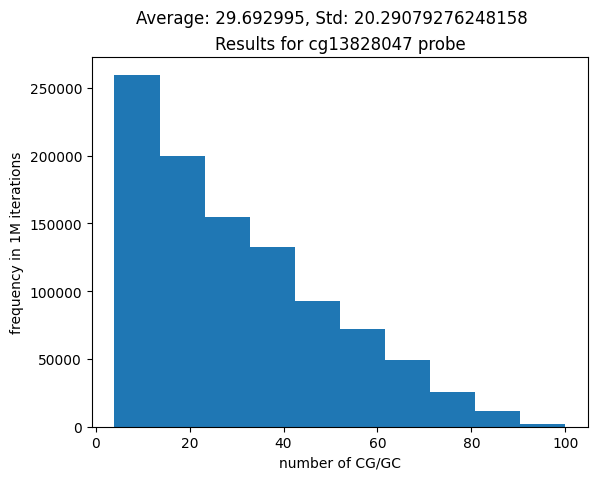

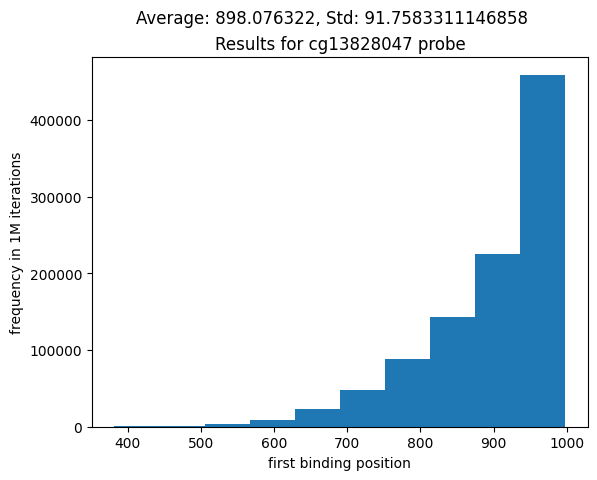

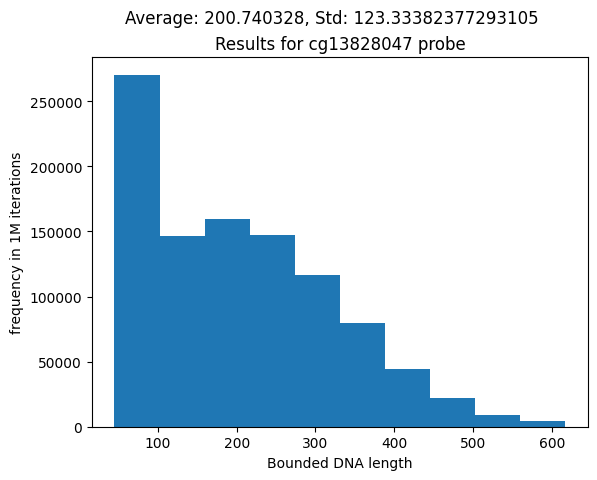

In [42]:
probe_id = "cg13828047"
cg13828047_seq, cg13828047_probe  = probe_init(cg13828047)
cg13828047_probe
CGS,idxes,lens = run_that_ship_2(cg13828047_seq)

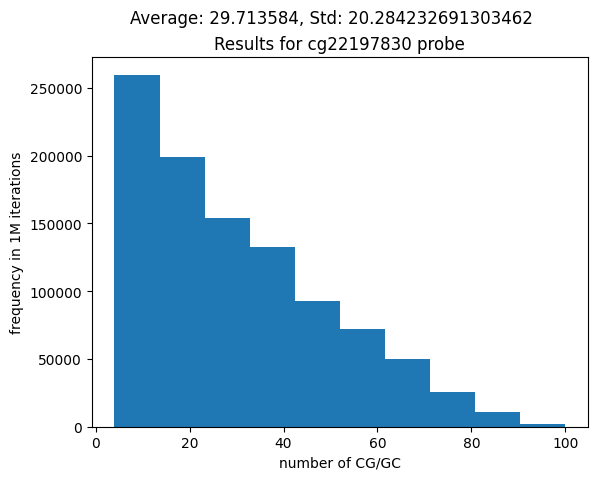

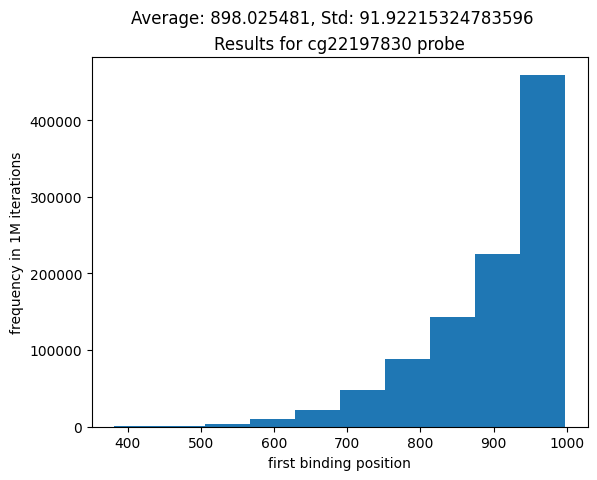

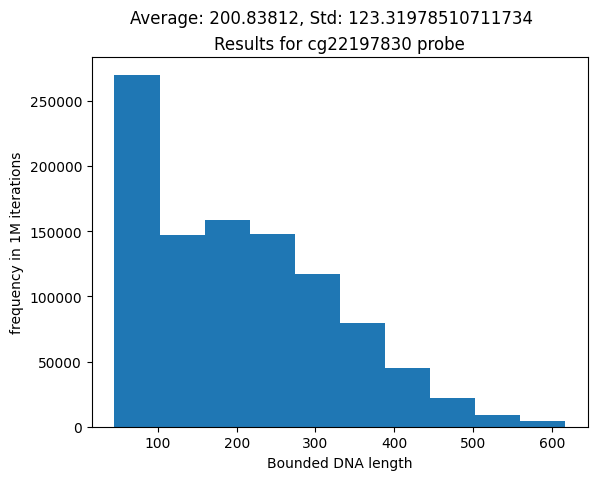

In [41]:
probe_id = "cg22197830"
cg22197830_seq, cg22197830_probe  = probe_init(cg22197830)
cg22197830_probe
CGS,idxes,lens = run_that_ship_2(cg13828047_seq)